# Capstone Project - The Battle of Neighborhoods (Week 1)

## **Introduction**

### **Discussion of the background and Description of the problem  (i.e. Business Understanding and Analytic Approach):**

Toronto, the capital of the province of Ontario, is the largest city of Canada with population over 2,826,498, and it is one of the most multicultural cities in the world, with immigrants bringing in their traditions, languages and especially their food culture into the city. **[1]**

Therefore, food service industry is one of the very important and yet competitive industries in Toronto to serve this highly populated and diversified city.  And finding of the best places for opening up new restaurants in Toronto are particularly important for restaurant investors to minimize their risk when entering into the restaurant food service sector.

However, due to Toronto’s historical immigration reasons and multicultural nature, different ethnic groups would have established their own ethnic community areas and preferred activity neighborhoods; this might affect new restaurants’ success and might add risks for the investors if restaurant location to their target restaurant clients are not matching properly.

So, we would like to use the tools of Data Science to find the best possible successful location for a new restaurant for particular ethic style restaurant (in this case location for a new Chinese restaurant).   We would like to use data analysis to consider the proposed restaurant locations’ population, and locations’ existing ethic food preference in recommendation of new restaurant locations.



### **Description of the data and how it will be used to solve the problem:** (Data Samples below)


#### **A) Data Analysis (i.e. Data Requirement and Data Collection):**

Data from the Government of Canadian Census 2016 data for Toronto, the venue exploration data from the Foursquare API, as well as Geometric data would be utilized for this new restaurant location search.

**1)**  **Pseudo-Household Demogarphic Distribution data from the Government of Canada Open Government site** (i.e. https://open.canada.ca/data/en/dataset/b3a1d603-19ca-466c-ae95-b5185e56addf ) would be used as population information source for the proposed location data.  **__[2]__**

The Pseudo-Household Demographic Distribution is a geospatial representative distribution of demographic data (population and households) derived from the Canadian Census from Statistics Canada.  

Pseudo-household demographics are currently used to calculate broadband Internet service availability, but are equally applicable to other disciplines requiring a spatial distribution of households or population.   And in our case, we would utilize this population data in help to search for new best restaurant location candidates.

We would use _Python Pandas_ package’s read_csv function to read in specific Pseudo-Household Demographic Distribution data .csv format file.   

Due to the large size of the original Government Canada Pseudo-Household Demographic Distribution .csv file for the whole Ontario, we would first remove extra unnecessary data outside of Toronto and would focus analysis on Toronto related data.


**2)**  **FourSquare API data** would be used to get existing restaurant ethnic style information from Foursquare database for various restaurant location candidates in Toronto. **__[3]__**

**3)** Python geopy geocoder classes for the **OpenStreetMap Nominatim database** would be used to handle geometric data lookup on getting the actual physical proposed restaurant locations from the final location candidates. **[4]**

  #### **References:**

  * **[1]** Toronto - Wikipedia
  
  * **[2]** Government of Canada, Open Government, Pseudo-Household Demographic Distribution  
      (https://open.canada.ca/data/en/dataset/b3a1d603-19ca-466c-ae95-b5185e56addf)
    
      Publisher : Current Organization Name: Innovation, Science and Economic Development Canada
      
      Licence: Open Government Licence - Canada (https://open.canada.ca/en/open-government-licence-canada)
    
  * **[3]**  www.foursquare.com
    Base URI:  api.foursquare.com/v2
  * **[4]** geopy geocoder classes for the OpenStreetMap Nominatim
    (http://nominatim.org/)

#### **B) Methology on Data Understanding and Data Preparation:**

##### **1. Descriptive statistics:**

In order to better understand the above data sources on population and location venues if there were any relationship to restaurant location and to access their data quality, we would use _Python Pandas, Numpy and Matplotlib libraries_ to perform descriptive statistics such as **Univariate statistics** (i.e. mean, minimum, maximum and standard deviation) and **Histogram** to see how variables are distributed and what sorts of data preparation may be needed to make variables more useful in model.


##### **2. Feature Engineering:**

We would use our domain knowledge of restaurant operation and understanding of data sources form above descriptive statistics analysis to perform Feature Engineering and to create features that make the machine learning algorithms work. 


##### **3. Model Evaluation:**

Since we are trying to find possible location grouping for restaurant, we would use the _Python SKLearn package_ to model **Unsupervised Learning method K-Means**.  And we would perform **Statistical Significance Testing** to tune and optimize the K-Means model.


##### **4. Data Visualization:**

We would use _Python Folium library_ for map visualization of the final proposed restaurant locations in a Toronto map.  And we would use _Python geopy geocoder classes for the OpenStreetMap Nominatim_ to get their actual physical location addresses.


#### **C) Coding on Data Section:**

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
import matplotlib.pyplot as plt
print('Libraries imported.')



Libraries imported.


#### Get Toronto's Pseudo-Household Demographic Distribution from government site:
Due to the large size of the original Government Canada Pseudo-Household Demographic Distribution .csv file for the whole Ontario, we would first remove extra unnecessary data outside of Toronto and would focus analysis on Toronto related data.

In [4]:
toronto_csv = pd.read_csv("PHH-ON_Toronto.csv")
print(toronto_csv.shape)
toronto_csv.head()

(40845, 10)


,PHH_ID,Type,POP,TDwell2016_TLog2016,URDwell2016_RH2016,DBUID_Ididu,HEXUID_IdUHEX,Pruid_Pridu,Latitude,Longitude
0,1798025,6,25.900000,5.900000,5.650000,35203509002,ON43690793,35,43.692913,-79.280054
1,1744786,3,32.777778,21.555556,21.333333,35200647003,ON43690793,35,43.683868,-79.280067
2,1798613,1,0.000000,0.000000,0.000000,35203532009,ON43740793,35,43.731089,-79.280076
3,1793069,4,19.600000,7.000000,7.000000,35203246007,ON43690793,35,43.684816,-79.280076
4,1798099,3,33.250000,11.000000,10.750000,35203512003,ON43690793,35,43.695481,-79.280081


#### Based on the Data Dictionary of the fields from the government site, we cleaned up the dataset to remove unnecessary columns (eg. PHH_ID, Pruid_Pridu, TDwell2016_TLog2016) and renamed columns to get better column names:

Field | Description
--|--
PHH_ID|Unique identifier for pseudo-household (PHH) representative point
Type|PHH Type:
 |1 = Centroid of a 2016 Census dissemination block,
 |2 = Atlas of Canada Placename point, 
 |3 = 2016 Census Road Network Address Range Left,
 |4 = 2016 Census Road Network Address Range Right,
 |5 = Previous representative point Left,
 |6 = Previous representative point Right 
Pop2016|PHH representative population
TDwell2016_TLog2016|PHH representative total private dwellings
URDwell2016_RH2016|PHH representative private dwellings occupied by usual residents
DBUID_Ididu|2016 Census dissemination block 
HEXUID_IdUHEX|Hexagon identifier
Pruid_Pridu|Province or territory name
Latitude|Latitude for the PHH representative point
Longitude|Longitude for the PHH representative point




In [7]:
df_toronto = toronto_csv.drop(['PHH_ID', 'TDwell2016_TLog2016', 'Pruid_Pridu', 'HEXUID_IdUHEX'], axis=1)
df_toronto.rename(columns={'POP':'population', 'URDwell2016_RH2016':'res_dwelling', 'DBUID_Ididu':'census_blk', 'HEXUID_IdUHEX':'hex_id'} , inplace=True)
print(df_toronto.shape)
df_toronto.head()

(40845, 6)


,Type,population,res_dwelling,census_blk,Latitude,Longitude
0,6,25.900000,5.650000,35203509002,43.692913,-79.280054
1,3,32.777778,21.333333,35200647003,43.683868,-79.280067
2,1,0.000000,0.000000,35203532009,43.731089,-79.280076
3,4,19.600000,7.000000,35203246007,43.684816,-79.280076
4,3,33.250000,10.750000,35203512003,43.695481,-79.280081


#### Get the centroid location of census block groups as the location of each census block

In [11]:
df_census_blk_locs = df_toronto.loc[ toronto_csv.loc[:, "Type"] == 1, ['census_blk', 'Latitude', 'Longitude'] ]
df_census_blk_locs.reset_index( inplace= True)
df_census_blk_locs.drop(['index'], axis=1, inplace=True)
print(df_census_blk_locs.shape)
df_census_blk_locs.head()

(5653, 3)


,census_blk,Latitude,Longitude
0,35203532009,43.731089,-79.280076
1,35203482017,43.716151,-79.280262
2,35203540004,43.742792,-79.280296
3,35203246001,43.685849,-79.280398
4,35203482007,43.723537,-79.280427


#### Remove data rows with no population or dwelling (i.e. highway or parks).  We are only interested in areas where there are population with needs for restaurant.

In [13]:
indexNoPopNoDwell = df_toronto[ (df_toronto['population'] == 0) | (df_toronto['res_dwelling'] == 0)].index
df_toronto.drop(indexNoPopNoDwell , inplace=True)

# reset index after dropped rows
df_toronto.reset_index(drop=True, inplace=True)
print(df_toronto.shape)

(34706, 6)


#### Find the population and dwelling sum on each census block.

In [14]:
df_census_pop = df_toronto.groupby('census_blk').agg({"population" :['sum'], "res_dwelling" :['sum']})
df_census_pop.columns = ["_".join(x) for x in df_census_pop.columns.ravel()]
df_census_pop.reset_index( inplace= True)
df_census_pop.head()

,census_blk,population_sum,res_dwelling_sum
0,35200374002,54.000000,21.000000
1,35200374003,238.000000,99.000000
2,35200374004,96.615385,36.923077
3,35200375005,73.000000,29.000000
4,35200375006,86.142857,33.428571


#### Merge census blocks population and location information together, and verify results.

In [16]:
df_census_blks = pd.merge(df_census_pop, df_census_blk_locs, on='census_blk')
print(df_census_blks.shape)
df_census_blks.head()

(4906, 5)


,census_blk,population_sum,res_dwelling_sum,Latitude,Longitude
0,35200374002,54.0,21.0,43.750348,-79.380589
1,35200374003,238.0,99.0,43.749567,-79.382978
2,35200375005,73.0,29.0,43.750505,-79.383083
3,35200376001,426.0,130.0,43.746556,-79.377856
4,35200376002,59.0,19.0,43.748757,-79.378210


In [17]:
# Verify result on the merge operation - 1
df_census_blk_locs['census_blk'].isin(df_census_pop['census_blk']).value_counts()

True     4906
False     747
Name: census_blk, dtype: int64

In [18]:
# Verify result of the merge operation - 2
df_census_pop['census_blk'].isin(df_census_blk_locs['census_blk']).value_counts()

True     4906
False      67
Name: census_blk, dtype: int64

#### The Merging operation seems ok.  Noticed that there are some census block population data rows which does not have matching location rows and vice versa.  This probably due to non-populated areas (i.e. highway and parks) which we removed earlier, or related to locations around the city boundaries.   Thus, that’s ok.


##### We would now perform some initial Descriptive Statistics to the Population and Residental Dwelling data.

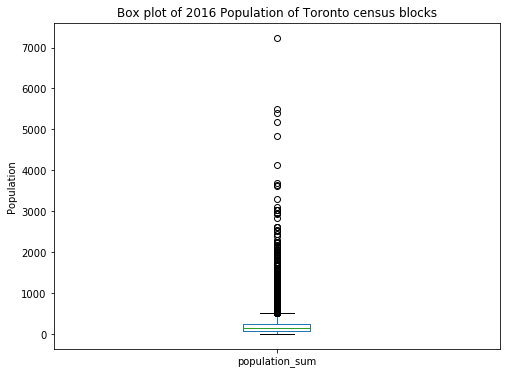

In [21]:
### BoxPlot on Population of all Toronto census blocks

df_census_blks.iloc[ : ,[1] ].plot(kind='box', figsize=(8, 6))
plt.title('Box plot of 2016 Population of Toronto census blocks')
plt.ylabel('Population')
plt.show()

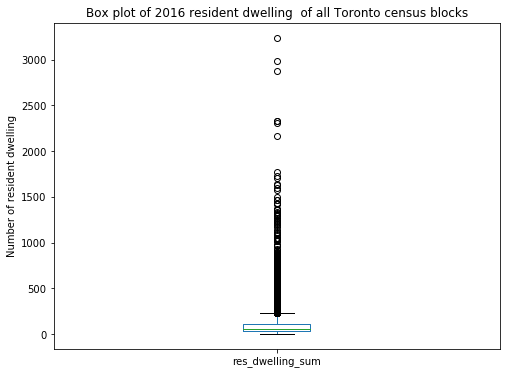

In [22]:
### BoxPlot on Resident dwelling of all Toronto selected census blocks

df_census_blks.iloc[ : ,[2] ].plot(kind='box', figsize=(8, 6))
plt.title('Box plot of 2016 resident dwelling  of all Toronto census blocks')
plt.ylabel('Number of resident dwelling')
plt.show()

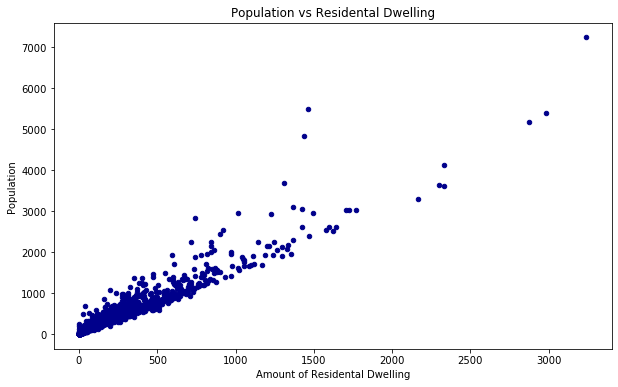

In [23]:
df_census_blks.plot(kind='scatter', x='res_dwelling_sum', y='population_sum', figsize=(10, 6), color='darkblue')
plt.title('Population vs Residental Dwelling')
plt.xlabel('Amount of Residental Dwelling')
plt.ylabel('Population')
plt.show()

#### From the above Box and Scatter plots, notices that population are not evenly distributed among census blocks within city Toronto.   Most census block areas are having very modest population (below 500), and there are a number of outliers that are having very high population, to as high as over 7000 population within the block.  

#### Since one of the successful factors for successful new restaurant is the number of potential customers, so higher the population among the restaurant's neighborhood would be the better.  So, we would focus our further analysis on block areas with population greater than 2500. 

In [28]:
# Areas with population greater than 2500
df_census_blks_GT25 = pd.DataFrame(df_census_blks.loc[df_census_blks.loc[:, 'population_sum'] >  2500,  : ])

# Sort census block based on population density
df_census_blks_GT25.sort_values(['population_sum'], ascending=False, inplace=True)

print(df_census_blks_GT25.shape)
df_census_blks_GT25.head()

(25, 5)


,census_blk,population_sum,res_dwelling_sum,Latitude,Longitude
4565,35204567001,7244.000000,3240.0,43.668674,-79.371902
4102,35204074001,5498.000000,1463.0,43.701554,-79.341123
4800,35204819002,5410.000000,2985.0,43.640416,-79.397862
4087,35204049014,5190.999999,2875.0,43.731038,-79.327276
4101,35204073006,4849.000001,1434.0,43.705947,-79.339509


#### Perform Descriptive Statistics again to these 25 blocks with Population greater than 2500.

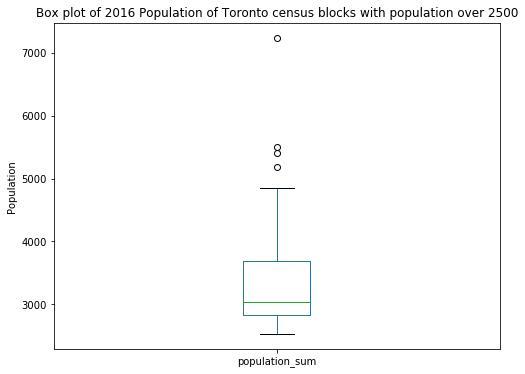

In [29]:
### BoxPlot on population of the selected 25 census blocks

df_census_blks_GT25.iloc[ : ,[1] ].plot(kind='box', figsize=(8, 6))

plt.title('Box plot of 2016 Population of Toronto census blocks with population over 2500')
plt.ylabel('Population')

plt.show()

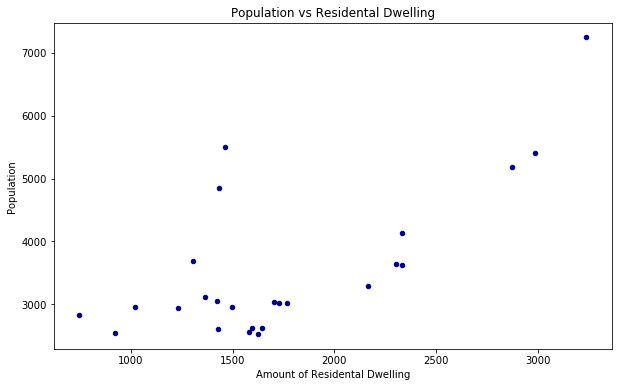

In [30]:
df_census_blks_GT25.plot(kind='scatter', x='res_dwelling_sum', y='population_sum', figsize=(10, 6), color='darkblue')

plt.title('Population vs Residental Dwelling')
plt.xlabel('Amount of Residental Dwelling')
plt.ylabel('Population')

plt.show()

#### Good! These looks better.
#### Now, we would use Foursquare to see sample data with venue information related to these 25 selected areas. 

#### Define Foursquare Credentials and Version

In [31]:
CLIENT_ID = 'EIXAIKKXGND2YFYGL2YCMFTFHXC1BCUXULBNCPMCW3PR2NEP' # your Foursquare ID
CLIENT_SECRET = 'E55GTLP2MO4KGK3CLZ3GL2XZ21DUUZUQXI32ODPZPUC2PDOH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credentails:
CLIENT_ID: EIXAIKKXGND2YFYGL2YCMFTFHXC1BCUXULBNCPMCW3PR2NEP
CLIENT_SECRET:E55GTLP2MO4KGK3CLZ3GL2XZ21DUUZUQXI32ODPZPUC2PDOH


#### Define function to extract category of the venue

In [33]:
#### Define function to extract category of the venue
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

    
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Set up Foursquare LIMIT and radius
#### Write code to run the above function on each of the 25 most populated census block and create a new dataframe called *toronto_venues*.

In [35]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

toronto_venues = getNearbyVenues(names=df_census_blks_GT25['census_blk'],
                                   latitudes=df_census_blks_GT25['Latitude'],
                                   longitudes=df_census_blks_GT25['Longitude']
                                  )

35204567001
35204074001
35204819002
35204049014
35204073006
35204606002
35204371001
35204676002
35204872001
35204004002
35204464001
35204564001
35204588001
35204900009
35204653009
35204367001
35204024001
35204072006
35204796001
35204826004
35204380001
35204666003
35204650006
35203520005
35204578001


#### Let's check the size of the resulting dataframe

In [36]:
print(toronto_venues.shape)
toronto_venues.head()

(1025, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,35204567001,43.668674,-79.371902,Cranberries,43.667843,-79.369407,Diner
1,35204567001,43.668674,-79.371902,Mr. Jerk,43.667328,-79.373389,Caribbean Restaurant
2,35204567001,43.668674,-79.371902,F'Amelia,43.667536,-79.368613,Italian Restaurant
3,35204567001,43.668674,-79.371902,Butter Chicken Factory,43.667072,-79.369184,Indian Restaurant
4,35204567001,43.668674,-79.371902,Murgatroid,43.667381,-79.369311,Restaurant


#### Analyze each selected populated census block, with specific focus on information related to restaurant

In [39]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
print(toronto_onehot.shape)
toronto_onehot.head()

restaurant_cols = [col for col in toronto_onehot.columns if 'Restaurant' in col]
print(len(restaurant_cols))
toronto_restaurants = toronto_onehot[restaurant_cols]
toronto_restaurants.head()

(1025, 199)
36


,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,New American Restaurant,Peruvian Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


#### And we would like to see the location of these 25 most populated locations

#### We use geopy library to get the latitude and longitude values of City Toronto, Ontario.

In [55]:
address = 'Toronto, ONT'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6781255, -79.6321235335026.


#### Then we create a map of Toronto, Ontario with the top 25 most populated areas superimposed on top.

In [56]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, census_blk, population_sum in zip(df_census_blks_GT25['Latitude'], df_census_blks_GT25['Longitude'], df_census_blks_GT25['census_blk'], df_census_blks_GT25['population_sum']):
    label = '{}, {}'.format(population_sum, census_blk)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Now we have done some initial analysis, data preparation and visualization of the 25 new restaurant location candidates.  
#### We would do further analysis and modeling in next week's Battle of the Neighborhood assignment.